# CS 109A/AC 209A/STAT 121A Data Science: Final Project
**Harvard University**<br>
**Fall 2016**<br>
**Instructors:** W. Pan, P. Protopapas, K. Rader<br>
**Members: ** Shawn Pan, Xinyuan (Amy) Wang, Ming-long Wu

## Remark ##

- Explore data from calendar_grid
- Found that price varies with time
- Average price in 365 days can be used as a predictor of price
- Low to mid range prices (< 600) tend to post 0~365 days in a year
- High price range (> 3000) tends to post more than 200 days in a year. Very few samples here though.
- **For weekly price trend, price surges on Friday and Saturday.**
- **For monthly price trend, price surges from March to September.**
- **For monthly price trend, price is lowest in January.**


In [188]:
import time
import pandas as pd
import numpy as np
import scipy as sp
from scipy.signal import savgol_filter
from scipy.stats import mode
import goslate
from langdetect import detect
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import dates
from matplotlib import colors
import matplotlib.dates as mdates
from datetime import datetime
from collections import Counter

%matplotlib inline

In [203]:
# read data
calendar = pd.read_csv('../../Data/calendar_grid.csv', delimiter = ',')

# check data
calendar.head(n=10)

,listing_id,01-01,01-02,01-03,01-04,01-05,01-06,01-07,01-08,01-09,...,12-22,12-23,12-24,12-25,12-26,12-27,12-28,12-29,12-30,12-31
0,3604481,600.0,600.0,600.0,600.0,600.0,600.0,600.0,600.0,600.0,...,600.0,600.0,600.0,600.0,600.0,600.0,600.0,600.0,600.0,600.0
1,2949128,NaN,NaN,NaN,NaN,NaN,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
2,4325397,100.0,100.0,100.0,100.0,100.0,70.0,70.0,70.0,80.0,...,70.0,70.0,70.0,80.0,80.0,70.0,70.0,70.0,70.0,70.0
3,4325398,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,275.0,275.0,275.0,275.0,275.0,275.0,275.0,275.0,275.0,275.0
4,3426149,NaN,NaN,NaN,NaN,100.0,100.0,NaN,NaN,NaN,...,95.0,95.0,95.0,95.0,95.0,95.0,95.0,95.0,95.0,95.0
5,65562,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,97.0,97.0,97.0,97.0,97.0,97.0,97.0,97.0,97.0,97.0
6,2730672,58.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,58.0,58.0,58.0,58.0,58.0,58.0,58.0,58.0,58.0,58.0
7,4587554,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,55.0,55.0,55.0,55.0,55.0,55.0,55.0,55.0,55.0,55.0
8,819206,NaN,NaN,NaN,70.0,70.0,70.0,70.0,70.0,70.0,...,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0
9,4849703,NaN,100.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
# check calendar size
print calendar.shape

(27392, 366)


In [39]:
calendar_np = calendar.values
calendar_np = np.delete(calendar_np, 0, axis=1)
# Check rows with complete 366 days of price data
check_nan = np.isnan(calendar_np)
row_nan_cnt = np.sum(check_nan, axis=1)
if_complete = row_nan_cnt==0

print 'Number of listing_id with complete 365 days of price: ' + str(np.sum(if_complete))

Number of listing_id with complete 365 days of price: 5764


In [146]:
col_idx = calendar.columns.values
col_idx = col_idx[1:]
datetime_all = []
for idx in range(col_idx.shape[0]):
   datetime_all.append(datetime.strptime('2015-' + col_idx[idx], '%Y-%m-%d'))


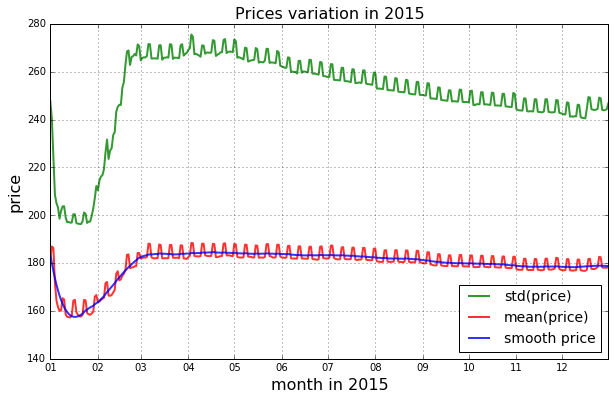

In [206]:
# Set date format
# years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
days = mdates.DayLocator() # every day
monthsFmt = mdates.DateFormatter('%m')

# Plot price variation according to date
fig2, ax2 = plt.subplots(1, 1, figsize=(10, 6))
col_mean=np.nanmean(calendar_np[:,:],axis=0)
col_mean_smooth=savgol_filter(col_mean,41,3)
col_std=np.nanstd(calendar_np[:,:],axis=0)
ax2.plot(datetime_all,col_std, c='green', label='std(price)', linewidth=2.0, alpha = 0.8)
ax2.plot(datetime_all,col_mean, c='red', label='mean(price)', linewidth=2.0, alpha = 0.8)
ax2.plot(datetime_all,col_mean_smooth, c='blue', label='smooth price', linewidth=2.0, alpha = 0.8)
ax2.set_xlabel('month in 2015', fontsize=16)
ax2.set_ylabel('price', fontsize=16)
ax2.set_title('Prices variation in 2015', fontsize=16)
# format the ticks
ax2.xaxis.set_major_locator(months)
ax2.xaxis.set_major_formatter(monthsFmt)
# ax2.xaxis.set_minor_locator(days)

#ax2.set_xlim([1,365])
plt.legend(loc = 4, fontsize = 14)
plt.grid()
plt.show()

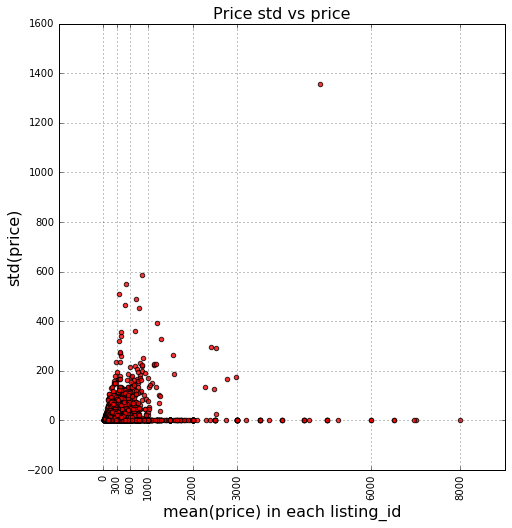

In [101]:
# Plot price standard deviation versus price
fig1, ax1 = plt.subplots(1, 1, figsize=(8, 8))
row_mean=np.nanmean(calendar_np[:,:],axis=1)
row_std=np.nanstd(calendar_np[:,:],axis=1)
ax1.scatter(row_mean, row_std, c='red', alpha = 0.8)
ax1.set_xlabel('mean(price) in each listing_id', fontsize=16)
ax1.set_ylabel('std(price)', fontsize=16)
ax1.set_title('Price std vs price', fontsize=16)
plt.xticks([0, 300, 600, 1000, 2000, 3000, 6000, 8000], rotation='vertical')
plt.grid()
plt.show()

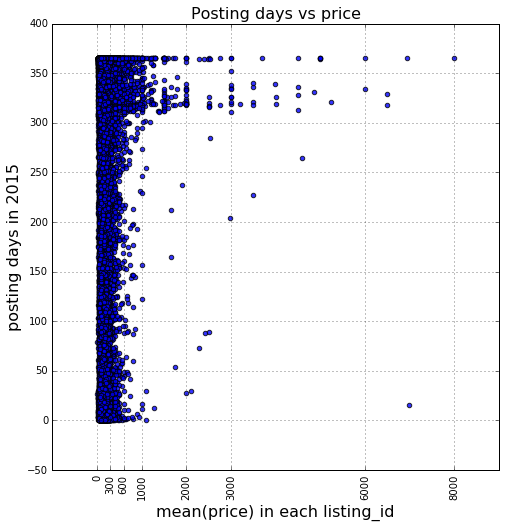

In [207]:
# Plot price standard deviation versus price
fig3, ax3 = plt.subplots(1, 1, figsize=(8, 8))
row_mean=np.nanmean(calendar_np[:,:],axis=1)
row_std=np.nanstd(calendar_np[:,:],axis=1)
row_nnan_cnt = 365 - row_nan_cnt
ax3.scatter(row_mean, row_nnan_cnt, c='Blue', alpha = 0.8)
ax3.set_xlabel('mean(price) in each listing_id', fontsize=16)
ax3.set_ylabel('posting days in 2015', fontsize=16)
ax3.set_title('Posting days vs price', fontsize=16)
plt.xticks([0, 300, 600, 1000, 2000, 3000, 6000, 8000], rotation='vertical')
plt.grid()
plt.show()

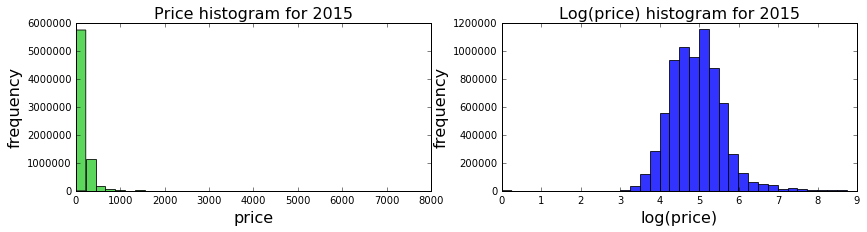

In [194]:
# Plot price histogram for all days
fig4, ax4 = plt.subplots(1, 2, figsize=(14, 3))
price_valid = calendar_np
price_valid = np.ndarray.flatten(price_valid)
price_valid = price_valid[~np.isnan(price_valid)] # remove NaN entries
price_valid = price_valid[price_valid!=0] # remove 10 entries with 0

ax4[0].hist(price_valid, bins=36, color='limegreen', alpha=0.8)
ax4[0].set_xlabel('price', fontsize=16)
ax4[0].set_ylabel('frequency', fontsize=16)
ax4[0].set_title('Price histogram for 2015', fontsize=16)

ax4[1].hist(np.log(price_valid), bins=36, color='Blue', alpha=0.8)
ax4[1].set_xlabel('log(price)', fontsize=16)
ax4[1].set_ylabel('frequency', fontsize=16)
ax4[1].set_title('Log(price) histogram for 2015', fontsize=16)

Total local price surge day: 109
['Sun', 'Mon', 'Tue', 'Wed', 'Thr', 'Fri', 'Sat']
(2, 1, 0, 0, 0, 52, 52)


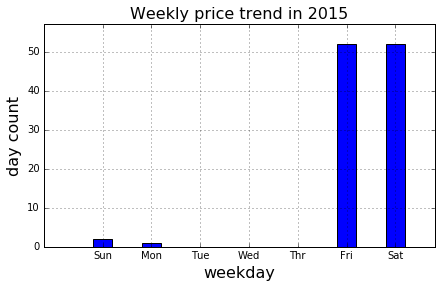

In [201]:
# Find local price surge days
days_local_surge=[]
for idx in range(365):
    if col_mean[idx] > col_mean_smooth[idx]:
        days_local_surge.append(datetime_all[idx].strftime("%a"))

# Plot histogram of local price surge days
c = Counter(days_local_surge)
Sun = c['Sun']
Mon = c['Mon']
Tue = c['Tue']
Wed = c['Wed']
Thr = c['Thr']
Fri = c['Fri']
Sat = c['Sat']

fig5, ax5 = plt.subplots(1, 1, figsize=(7, 4))
bar_heights = (Sun, Mon, Tue, Wed, Thr, Fri, Sat)
x = (1, 2, 3, 4, 5, 6, 7)
width = 0.4
ax5.bar(x, bar_heights, width)

ax5.set_xlim((0, 8))
ax5.set_ylim((0, max(bar_heights)*1.1))

ax5.set_xticks([i+width/2 for i in x])
ax5.set_xticklabels(['Sun', 'Mon', 'Tue', 'Wed', 'Thr', 'Fri', 'Sat'])

ax5.set_xlabel('weekday', fontsize=16)
ax5.set_ylabel('day count', fontsize=16)
ax5.set_title('Weekly price trend in 2015', fontsize=16)

print 'Total local price surge day: ' + str(len(days_local_surge))
print ['Sun', 'Mon', 'Tue', 'Wed', 'Thr', 'Fri', 'Sat']
print bar_heights

plt.grid()
plt.show()


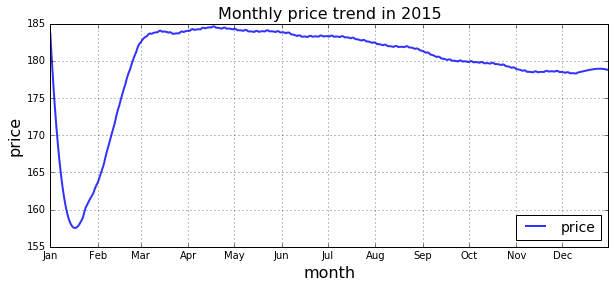

In [205]:
# Plot global trend of price
fig6, ax6 = plt.subplots(1, 1, figsize=(10, 4))
ax6.plot(datetime_all,col_mean_smooth, c='blue', label='price', linewidth=2.0, alpha = 0.8)
ax6.set_xlabel('month', fontsize=16)
ax6.set_ylabel('price', fontsize=16)
ax6.set_title('Monthly price trend in 2015', fontsize=16)
# format the ticks
ax6.xaxis.set_major_locator(months)
ax6.xaxis.set_major_formatter(monthsFmt)
ax6.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug',
                     'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(loc = 4, fontsize = 14)
plt.grid()
plt.show()